In [1]:
# import dependencies
%pip install pyreadr
import pyreadr
%pip install rdata
import rdata
import pandas as pd
import datetime
from pathlib import Path
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.ticker import MultipleLocator


Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


Read-in csv and assess for preprocessing

In [2]:
import pandas as pd

harris_co_df = pd.read_csv(r'C:\Users\rasha\Project2\Resources\houston-metro-cleaned.csv')
harris_co_df.head()

,Date,Min Ambient Temp,Max Ambient Temp,Mean Ambient Temp,Min Heat Index,Max Heat Index,Mean Heat Index,Min WBGT,Max WBGT,Mean WBGT
0,2000-01-02,65.606,77.522,70.268,66.254,77.774,70.862,64.346,73.166,67.928
1,2000-01-02,66.488,75.740,70.106,67.190,76.262,70.862,65.138,73.634,68.774
2,2000-01-02,65.156,74.246,68.432,65.804,74.930,69.188,63.986,74.138,67.748
3,2000-01-02,65.930,77.360,70.484,66.578,77.684,71.168,64.616,73.418,68.504
4,2000-01-02,65.732,73.814,68.828,66.362,74.444,69.602,64.436,73.382,68.036


### Time-Series Analysis Insights

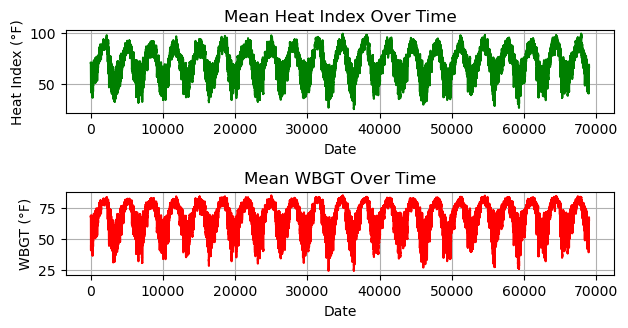

In [3]:
# Convert the 'Date' column to datetime format
import matplotlib.pyplot as plt

plt.subplot(312)
plt.plot(harris_co_df.index, harris_co_df['Mean Heat Index'], label='Mean Heat Index', color='green')
plt.title('Mean Heat Index Over Time')
plt.xlabel('Date')
plt.ylabel('Heat Index (°F)')
plt.grid(True)

plt.subplot(313)
plt.plot(harris_co_df.index, harris_co_df['Mean WBGT'], label='Mean WBGT', color='red')
plt.title('Mean WBGT Over Time')
plt.xlabel('Date')
plt.ylabel('WBGT (°F)')
plt.grid(True)

plt.tight_layout()
plt.show()



### The plots above illustrate the trends over time for the following variables:

Mean Ambient Temp (Top Plot):

The plot shows clear seasonal patterns with temperatures peaking during the summer months and dipping in the winter months. There may be subtle long-term trends, such as gradual increases in summer peaks or winter lows.
Mean Heat Index (Middle Plot):

The heat index follows a similar seasonal pattern to the ambient temperature, but with higher peaks during the summer. This reflects the impact of humidity on perceived heat, making it feel hotter than the actual temperature during the warmer months.
Mean WBGT (Bottom Plot):

The WBGT, which accounts for temperature, humidity, wind speed, and solar radiation, also exhibits strong seasonal patterns. Like the heat index, WBGT values peak during the summer months, indicating higher levels of heat stress.

In [4]:
harris_co_df

,Date,Min Ambient Temp,Max Ambient Temp,Mean Ambient Temp,Min Heat Index,Max Heat Index,Mean Heat Index,Min WBGT,Max WBGT,Mean WBGT
0,2000-01-02,65.606,77.522,70.268,66.254,77.774,70.862,64.346,73.166,67.928
1,2000-01-02,66.488,75.740,70.106,67.190,76.262,70.862,65.138,73.634,68.774
2,2000-01-02,65.156,74.246,68.432,65.804,74.930,69.188,63.986,74.138,67.748
3,2000-01-02,65.930,77.360,70.484,66.578,77.684,71.168,64.616,73.418,68.504
4,2000-01-02,65.732,73.814,68.828,66.362,74.444,69.602,64.436,73.382,68.036
...,...,...,...,...,...,...,...,...,...,...
69016,2020-12-30,65.192,73.058,67.568,65.840,73.796,68.198,63.338,73.904,66.812
69017,2020-12-30,63.230,74.930,67.208,63.842,75.524,67.784,61.916,74.678,66.254
69018,2020-12-30,62.996,72.986,66.236,63.392,73.634,66.830,61.016,73.256,65.552
69019,2020-12-30,59.486,73.796,65.840,59.828,74.300,66.362,58.568,73.418,64.994


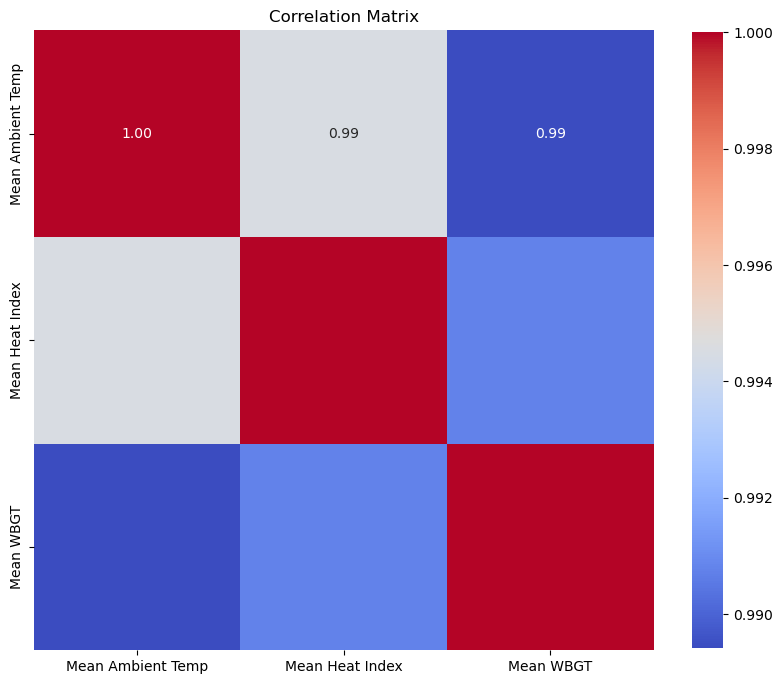

,Mean Ambient Temp,Mean Heat Index,Mean WBGT
Mean Ambient Temp,1.000000,0.994534,0.989415
Mean Heat Index,0.994534,1.000000,0.990764
Mean WBGT,0.989415,0.990764,1.000000


In [5]:
import seaborn as sns

# Calculate the correlation matrix for the key variables
correlation_matrix = harris_co_df[['Mean Ambient Temp', 'Mean Heat Index', 'Mean WBGT']].corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(10, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
plt.title('Correlation Matrix')
plt.show()

# Display the correlation matrix values
correlation_matrix


### The heatmap and correlation matrix reveal the following key insights:

High Correlation Between Variables:
Mean Ambient Temp and Mean Heat Index: These two variables are highly correlated (0.99), indicating that as the ambient temperature increases, the perceived heat (as measured by the heat index) also rises. This strong correlation is expected, as the heat index is calculated based on ambient temperature and humidity.
Mean Ambient Temp and Mean WBGT: The correlation between ambient temperature and WBGT is also very high (0.99). WBGT accounts for temperature, humidity, wind speed, and solar radiation, which makes its correlation with ambient temperature significant.
Mean Heat Index and Mean WBGT: The correlation between the heat index and WBGT is similarly strong (0.99), reflecting that both metrics are closely related in capturing heat stress conditions.